# Task1:Prediction using Supervised ML

# Problem Statement

Predict the percentage of an student based on the no. of study hours

## Dataset

Click here to download the dataset : http://bit.ly/w-data

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

### Reading Dataset and make dataframe

In [2]:
Hours = np.array([2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8])
Scores = np.array([21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86])
data = {"Hours":Hours,"Scores":Scores}
df = pd.DataFrame(data=data)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 428.0 bytes


### Making Histogram of feature column

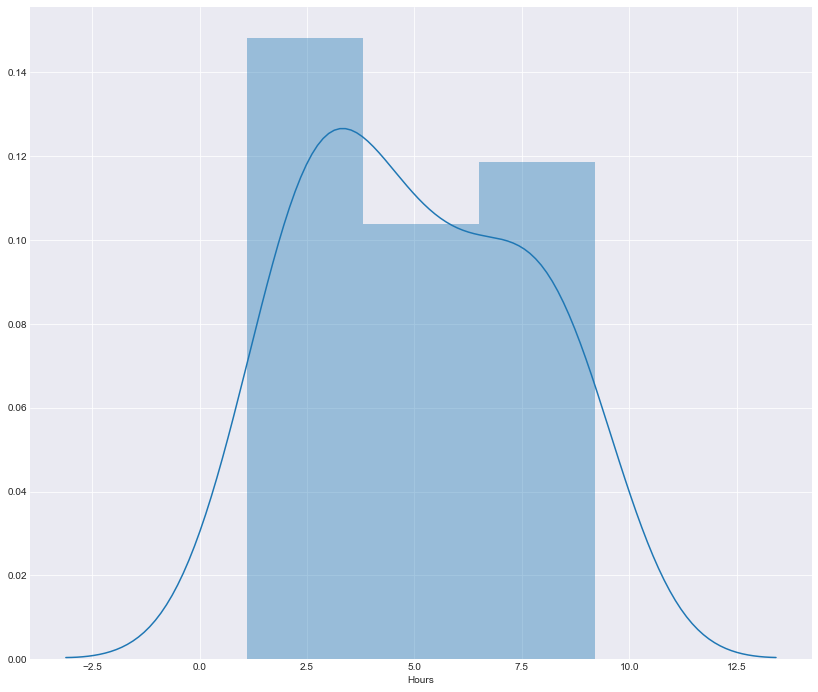

In [6]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,12))
sns.distplot(df["Hours"])
plt.show()
#Data of feature column is normally distributed.

### Scatter plot between feature and target column

As, u can see target value is increasing gradually with the increasing in the feature column value

<Figure size 1008x864 with 0 Axes>

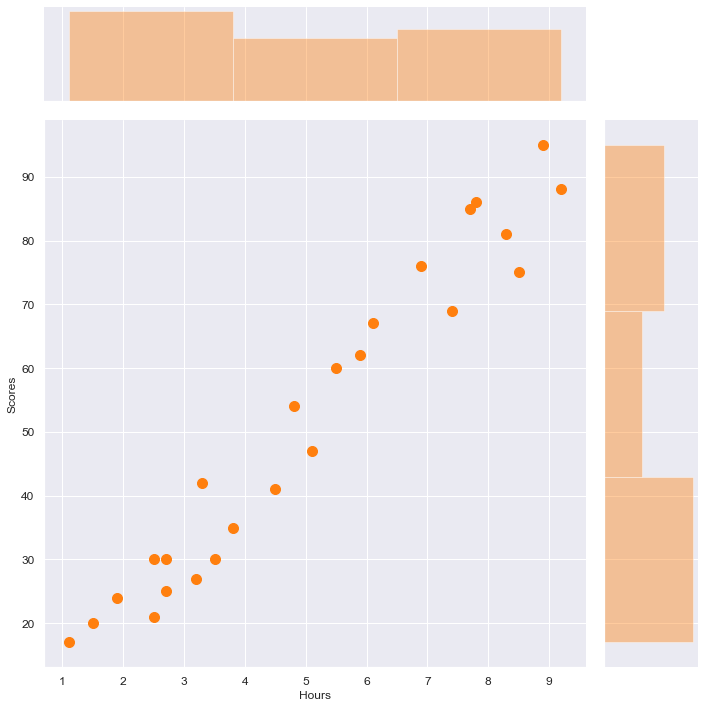

In [9]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,12))
sns.set(rc={'xtick.labelsize':12,'ytick.labelsize':12,'axes.labelsize':12})

scatter = sns.jointplot(data=df,x="Hours",y="Scores",color=(255/255.,127/255.,14/255.),kind="scatter",s=100,height=10)
plt.show()

### Seperating the feature and target column from dataframe 

In [10]:
X,y = df.iloc[:,0].values,df.iloc[:,1].values

### Building Linear Regression Model

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X.reshape((-1,1)),y)

LinearRegression()

In [13]:
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

intercept: 2.483673405373196
slope: [9.77580339]


### Evaluating Model

In [14]:
y_pred = lr.predict(X.reshape((-1,1)))

#### Calculating RMSE 

In [15]:
rms = sqrt(mean_squared_error(y, y_pred))
print("Root Mean Square Error : ",rms)

Root Mean Square Error :  5.374265578592619


## Evaulating Model by making Scatter and line graph

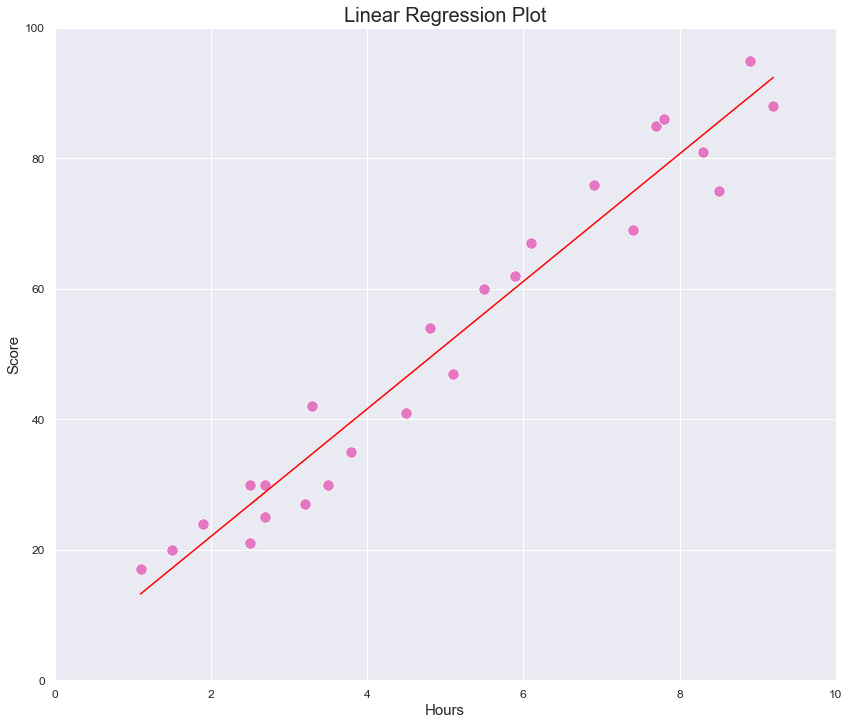

In [22]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,12))
sns.set(rc={'xtick.labelsize':12,'ytick.labelsize':12,'axes.labelsize':12})
scatter = sns.scatterplot(x=X,y=y,s=130,color = (227/255.,119/255.,194/255.))
scatter.set(xlim=(0, 10),ylim=(0, 100))
scatter.set_xlabel("Hours",size=15)
scatter.set_ylabel("Score",size=15)
plt.title('Linear Regression Plot',size = 20)
sns.lineplot(x=X,y=y_pred,color="red")
plt.show()